<a href="https://colab.research.google.com/github/priyankadeep/Crime-rate-analysis/blob/main/Crime_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Reading the file
df = pd.read_csv('/content/hatecrime.csv')
df

In [ ]:
# checking correlation among various parameters to detrmine which ones to choose for regression
import seaborn as sns
corr_df = df.corr()
mask = np.zeros_like(corr_df , dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True, mask = mask, xticklabels=corr_df.columns.values, yticklabels=corr_df.columns.values)


In [ ]:
# Question 2.1
# Creating our independent and response various based on the correaltion
# It can be seen that the columns hate_crimes_per_100k_splc and avg_hatecrimes_per_100k_fbi are related to the gini index
y = df['gini_index']
X = df[['hate_crimes_per_100k_splc','avg_hatecrimes_per_100k_fbi']]
X = sm.add_constant(X)

In [ ]:
# Creating the linear regression model and printing the model's details and various parametric summaries
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())

In [ ]:
# Question 2.2
y_1 = df['hate_crimes_per_100k_splc']
X_1 = df[['share_non_white', 'share_non_citizen']]
X_1 = sm.add_constant(X_1)

In [ ]:
lr_model1 = sm.OLS(y_1,X_1).fit()
print(lr_model1.summary())

                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.071
Model:                                   OLS   Adj. R-squared:                  0.027
Method:                        Least Squares   F-statistic:                     1.612
Date:                       Sun, 11 Feb 2024   Prob (F-statistic):              0.212
Time:                               02:42:41   Log-Likelihood:                0.42017
No. Observations:                         45   AIC:                             5.160
Df Residuals:                             42   BIC:                             10.58
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

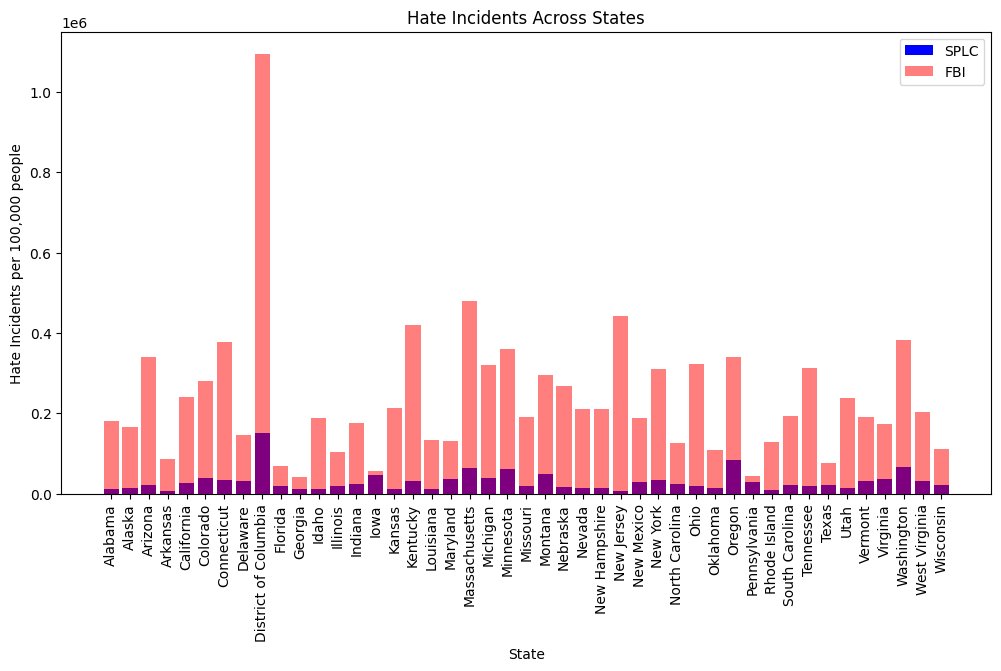

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


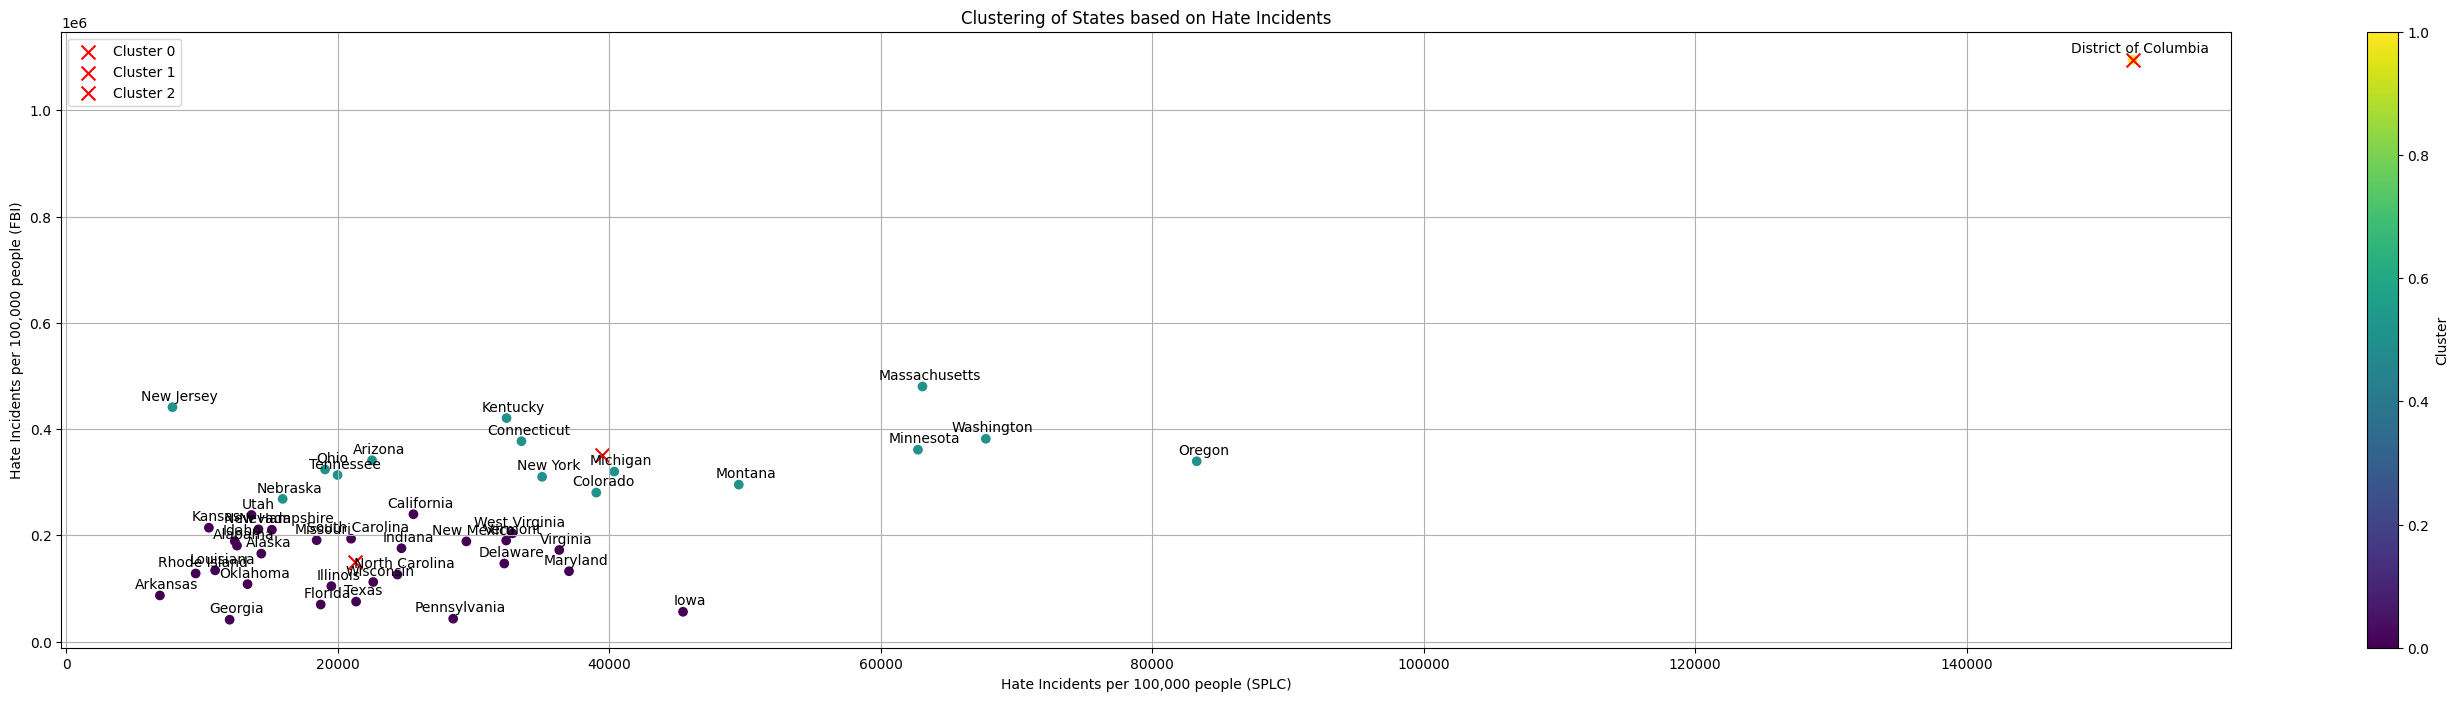

ANOVA p-value: 1.0935524900246094e-10


In [ ]:
# Question 2.3
from scipy import stats

# Calculate hate incidents (per 100,000 people) for SPLC and FBI data
df['hate_incidents_splc'] = df['hate_crimes_per_100k_splc'] * 100000
df['hate_incidents_fbi'] = df['avg_hatecrimes_per_100k_fbi'] * 100000


# Visualize hate crimes across states
plt.figure(figsize=(12, 6))
plt.bar(df['state'], df['hate_incidents_splc'], color='blue', label='SPLC')
plt.bar(df['state'], df['hate_incidents_fbi'], color='red', alpha=0.5, label='FBI')
plt.xlabel('State')
plt.ylabel('Hate Incidents per 100,000 people')
plt.title('Hate Incidents Across States')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# Perform clustering
X = df[['hate_incidents_splc', 'hate_incidents_fbi']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize clusters with labels
plt.figure(figsize=(35, 8))
plt.scatter(df['hate_incidents_splc'], df['hate_incidents_fbi'], c=df['cluster'], cmap='viridis')
plt.xlabel('Hate Incidents per 100,000 people (SPLC)')
plt.ylabel('Hate Incidents per 100,000 people (FBI)')
plt.title('Clustering of States based on Hate Incidents')

# Add cluster centroids
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', color='red', label=f'Cluster {i}', s=100)

# Add state labels for each cluster
for state, x, y, cluster in zip(df['state'], df['hate_incidents_splc'], df['hate_incidents_fbi'], df['cluster']):
    plt.annotate(state, (x, y), textcoords="offset points", xytext=(5,5), ha='center')

plt.colorbar(label='Cluster')
plt.grid(True)
plt.legend()
plt.show()

# Statistical analysis
cluster0 = df[df['cluster'] == 0]['hate_incidents_splc']
cluster1 = df[df['cluster'] == 1]['hate_incidents_splc']
cluster2 = df[df['cluster'] == 2]['hate_incidents_splc']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(cluster0, cluster1, cluster2)
print("ANOVA p-value:", p_value)